In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

Text(0, 0.5, 'inches')

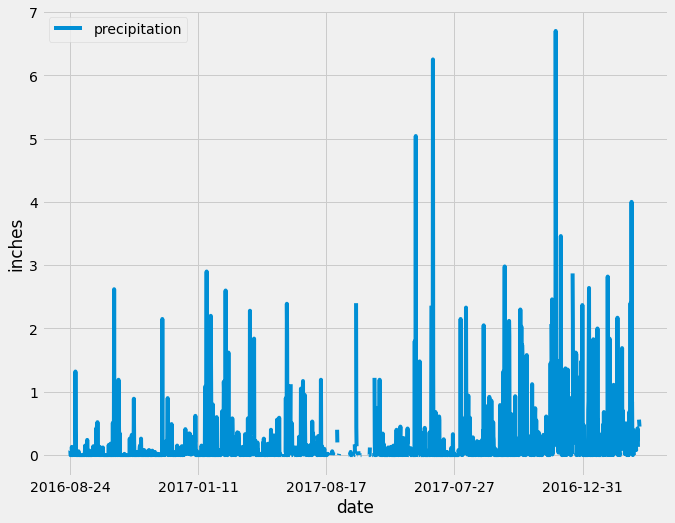

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

results = session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).all()
results

import datetime as dt
results = session.query(measurement.date).order_by(measurement.date.desc())
lastdate =results[0][0]
lastdate_dt = dt.date(int(lastdate[0:4]), int(lastdate[5:7]), int(lastdate[8:10]) ) 
date_1yr_ago = lastdate_dt-dt.timedelta(days=365)



# Perform a query to retrieve the data and precipitation scores

results = session.query(measurement.date, measurement.prcp).filter(measurement.date > date_1yr_ago).all()
results

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results[:], columns=['date', 'precipitation'])
df.set_index('date', inplace=True)
df

# Sort the dataframe by date
df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.columns

df.plot(y='precipitation', use_index=True,figsize=(10,8))
plt.ylabel('inches')



In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()



,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
session.close()

results = session.query(measurement.station).distinct().count()
results

9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

sel = [measurement.station, 
       func.count(measurement.station)]
active_station = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

In [18]:
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

session.close()

results = session.query(measurement.station, measurement.tobs)
results

sel2 = [measurement.station,
       func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)]
temp = session.query(*sel2).\
    filter(measurement.station == "USC00519281").all()
temp


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

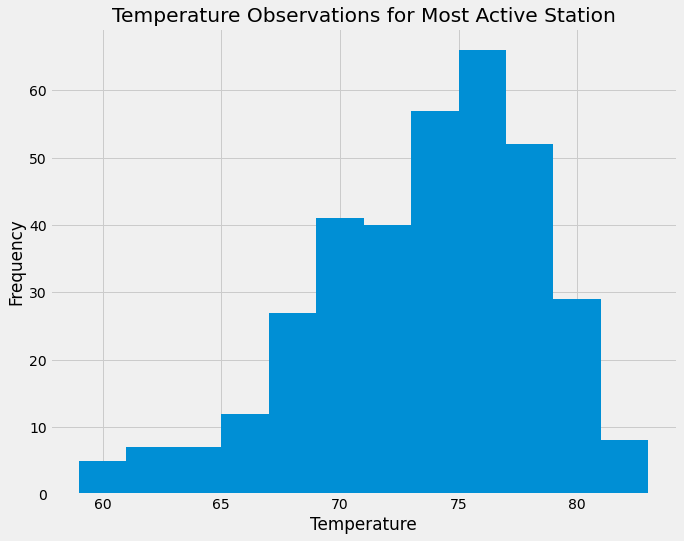

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

session.close()

temp_most_active = session.query(measurement.date,measurement.tobs).\
    filter(measurement.station == "USC00519281").\
    filter(measurement.date > date_1yr_ago).all()
temp_most_active

df_temp = pd.DataFrame(temp_most_active, columns=['date', 'Temperature Observations for Most Active Station'])
df_temp
hist = df_temp.hist(bins=12,figsize=(10,8))
plt.ylabel('Frequency')
plt.xlabel('Temperature');